In [ ]:
!unzip archive.zip

In [ ]:
!unzip mpob.zip

In [ ]:
!unzip mpob_dataset.zip

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML

In [3]:
# directory of the parent folder that contain train and test datasets
sdir=r'/content/mpob'
# sdir=r'/content/augment_data6'
# create a blank list to store data's path
filepaths=[]
# create a blank list to store data's label
labels=[]
# list the files inside the parent folder
class_list=os.listdir(sdir)
for klass in class_list:
    # concatenate the directory of the parent folder and child folder to form the exact directory of the child folder
    class_path=os.path.join(sdir,klass) # example path = /content/mpob/algaeleafspot
    # list the files inside the child folder
    flist=os.listdir(class_path)    
    for f in flist:
        # concatenate the directory of child folder and the data 
        fpath=os.path.join(class_path,f)
        # append the data's path to the list
        filepaths.append(fpath)
        # append the label of the data to the list
        labels.append(klass)
        
# to create a series of the data's path
Fseries= pd.Series(filepaths, name='filepaths')
# to create a series of the data's label
Lseries=pd.Series(labels, name='labels')
# to create a dataframe
df=pd.concat([Fseries, Lseries], axis=1)
print (df.head())
# print the number of occurences of the unique label data
print (df['labels'].value_counts())

                                   filepaths      labels
0  /content/mpob/stemwetrot/stemwetrot-4.jpg  stemwetrot
1  /content/mpob/stemwetrot/stemwetrot-6.jpg  stemwetrot
2  /content/mpob/stemwetrot/stemwetrot-1.jpg  stemwetrot
3  /content/mpob/stemwetrot/stemwetrot-5.jpg  stemwetrot
4  /content/mpob/stemwetrot/stemwetrot-2.jpg  stemwetrot
bunchrot          10
orangespotting     7
stemwetrot         6
charcoalrot        4
algaeleafspot      4
sootymold          4
Name: labels, dtype: int64


In [5]:
# height of the image
height=224
# width of the image
width=224
# channels 0:black/white image, 3:color image
channels=3
batch_size=len(df)
img_shape=(height, width, channels)
img_size=(height, width)
LABELS = list(df.labels.unique())

# directory of the folder that the augmented image to be saved
save_dir = '/content/augment_data/'

# function to scale the image to -1 to 1
def scalar(img):
    return img/127.5-1

for label in LABELS: 
  # define a instance object of image data generator
  gen=ImageDataGenerator(zoom_range=[0.5,1.0], rotation_range =15, width_shift_range = 0.2, height_shift_range = 0.2, fill_mode = 'nearest', 
                         horizontal_flip = True, preprocessing_function=scalar)
  #  loads the image dataset in memory and generates batches of augmented data
  datagen=gen.flow_from_dataframe(df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical', color_mode='rgb', 
                                  shuffle=True, classes=[label], save_to_dir=save_dir+label, save_format='jpg', save_prefix='aug_', 
                                  batch_size=batch_size)
  
  for i in range(100):
    batch = next(datagen) 

Found 6 validated image filenames belonging to 1 classes.
Found 7 validated image filenames belonging to 1 classes.
Found 4 validated image filenames belonging to 1 classes.
Found 4 validated image filenames belonging to 1 classes.
Found 10 validated image filenames belonging to 1 classes.
Found 4 validated image filenames belonging to 1 classes.


In [ ]:
train_split=.9
test_split=.05
dummy_split=test_split/(1-train_split)
# split the entire dataframe to trainning dataframe and dummy dataframe
train_df, dummy_df=train_test_split(df, train_size=train_split, shuffle=True, random_state=123)
# the dummy dataframe is then used to form the testing dataframe and validation dataframe
test_df, valid_df=train_test_split(dummy_df, train_size=dummy_split, shuffle=True, random_state=123)
print ('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))

train_df length:  3181   test_df length:  177   valid_df length:  177


In [ ]:
height=224
width=224
channels=3
batch_size=40
# define the shape of the image
# if the image is gray-scale then the channel of the image is 1 whereas if the image is rgb then the channel of the image is 3 
img_shape=(height, width, channels)
# define the size of the image
img_size=(height, width)
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=batch_size],reverse=True)[0]  
test_steps=int(length/test_batch_size)
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)

# define the function to scale the pixel value of the image to the range of -1 to 1
def scalar(img):
    return img/127.5-1  # scale pixel between -1 and +1
  
gen=ImageDataGenerator(preprocessing_function=scalar)
train_gen=gen.flow_from_dataframe( train_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
test_gen=gen.flow_from_dataframe( test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)
valid_gen=gen.flow_from_dataframe( valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)

# print the labels of the images
classes=list(train_gen.class_indices.keys())
print (classes)
class_count=len(classes)

NameError: ignored

In [ ]:
class_weight={}
train_dict=train_gen.class_indices
classes=list(train_dict.keys())
train_files=train_gen.filenames
train_labels=train_gen.labels
class_count=len(classes)

print ('length train files: ', len(train_files), '  number of classes: ', class_count)
train_dir=os.path.join(sdir, 'train')
msg='{0:^30s}{1:^10s}{2:^9s}'.format('Class', 'Samples', 'Weight')
print(msg)

balance=train_df['labels'].value_counts()
print (balance)
balance_df=pd.DataFrame(balance)
print (balance_df.head())

for i, count in enumerate(balance_df['labels']):
    class_weight[i]=901/count
print (class_weight)

length train files:  3181   number of classes:  6
            Class              Samples   Weight  
bunchrot          901
orangespotting    637
stemwetrot        535
charcoalrot       378
sootymold         365
algaeleafspot     365
Name: labels, dtype: int64
                labels
bunchrot           901
orangespotting     637
stemwetrot         535
charcoalrot        378
sootymold          365
{0: 1.0, 1: 1.414442700156986, 2: 1.6841121495327103, 3: 2.3835978835978837, 4: 2.4684931506849317, 5: 2.4684931506849317}


In [ ]:
def show_image_samples(gen):
    test_dict=test_gen.class_indices
    classes=list(test_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image=(images[i]+1 )/2 # scale images between 0 and 1 becaue pre-processor set them between -1 and +1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=16)
        plt.axis('off')
    plt.show()

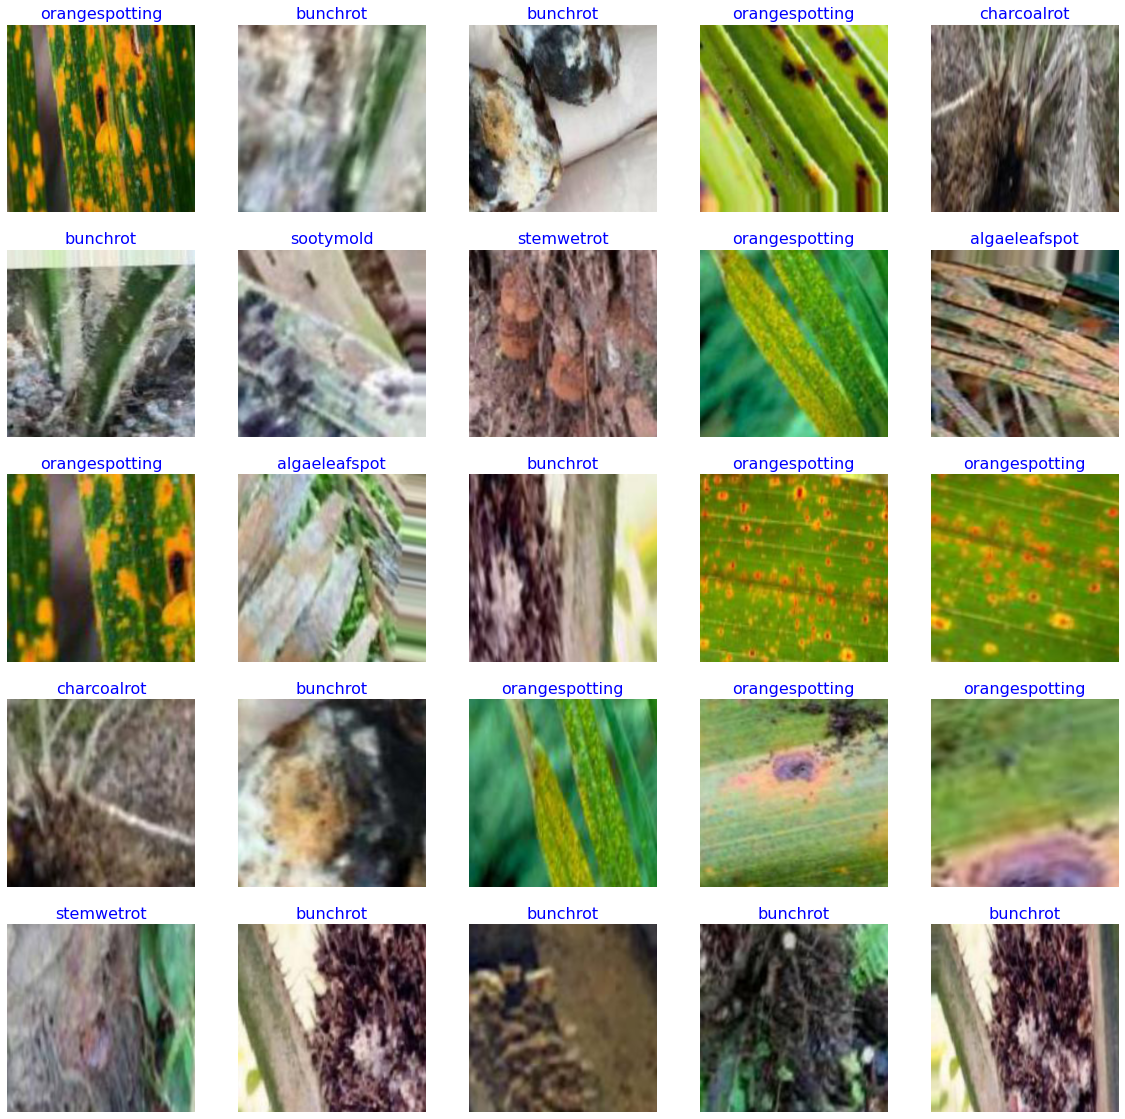

In [ ]:
show_image_samples(train_gen)

In [ ]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

In [ ]:
# Learning Rate Annealing
class LRA(keras.callbacks.Callback):
    reset=False
    count=0
    stop_count=0
    tepochs=0
    def __init__(self,model, patience,stop_patience, threshold, factor, dwell, model_name, freeze, initial_epoch):
        super(LRA, self).__init__()
        self.model=model
        self.patience=patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience=stop_patience
        self.threshold=threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor=factor # factor by which to reduce the learning rate
        self.dwell=dwell
        self.lr=float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initiallearning rate and save it in self.lr
        self.highest_tracc=0.0 # set highest training accuracy to 0
        self.lowest_vloss=np.inf # set lowest validation loss to infinity
        #self.count=0 # initialize counter that counts epochs with no improvement
        #self.stop_count=0 # initialize counter that counts how manytimes lr has been adjustd with no improvement  
        self.initial_epoch=initial_epoch 
        #self.epochs=epochs
        best_weights=self.model.get_weights() # set a class variable so weights can be loaded after training is completed        
        msg=' '
        if freeze==True:
            msgs=f' Starting training using  base model { model_name} with weights frozen to imagenet weights initializing LRA callback'
        else:
            msgs=f' Starting training using base model { model_name} training all layers '            
        print_in_color (msgs, (244, 252, 3), (55,65,80)) 
        
    def on_epoch_begin(self,epoch, logs=None):
        self.now= time.time()
        
    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        later=time.time()
        duration=later-self.now        
        if epoch== self.initial_epoch or LRA.reset==True:  
            LRA.reset=False           
            msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^11s}{8:^8s}'.format('Epoch', 'Loss', 'Accuracy','V_loss','V_acc', 'LR', 'Next LR', 'Monitor', 'Duration')
            print_in_color(msg, (244,252,3), (55,65,80)) 
            
        lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr=lr
        v_loss=logs.get('val_loss')  # get the validation loss for this epoch
        acc=logs.get('accuracy')  # get training accuracy for this epoch
        v_acc=logs.get('val_accuracy') # get the validation accuracy for this epoch
        loss=logs.get('loss') # get the loss for this epoch
        #print ( '\n',v_loss, self.lowest_vloss, acc, self.highest_tracc)

        if acc < self.threshold: # if training accuracy is below threshold so adjust learning rate based on training accuracy
            monitor='accuracy'
            if acc>self.highest_tracc: # training accuracy improved in the epoch                
                self.highest_tracc=acc # set new highest training accuracy
                LRA.best_weights=self.model.get_weights() # traing accuracy improved so save the weights
                self.count=0 # set count to 0 since training accuracy improved
                self.stop_count=0 # set stop counter to 0
                if v_loss<self.lowest_vloss:
                    self.lowest_vloss=v_loss
                color= (0,255,0)
                self.lr=lr
            else: 
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count>=self.patience -1:
                    color=(245, 170, 66)
                    self.lr= lr* self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, self.lr) # set the learning rate in the optimizer
                    self.count=0 # reset the count to 0
                    self.stop_count=self.stop_count + 1
                    if self.dwell:
                        self.model.set_weights(LRA.best_weights) # return to better point in N space                        
                    else:
                        if v_loss<self.lowest_vloss:
                            self.lowest_vloss=v_loss                                    
                else:
                    self.count=self.count +1 # increment patience counter                    
        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor='val_loss'
            if v_loss< self.lowest_vloss: # check if the validation loss improved 
                self.lowest_vloss=v_loss # replace lowest validation loss with new validation loss                
                LRA.best_weights=self.model.get_weights() # validation loss improved so save the weights
                self.count=0 # reset count since validation loss improved  
                self.stop_count=0  
                color=(0,255,0)
                self.lr=lr
            else: # validation loss did not improve
                if self.count>=self.patience-1:
                    color=(245, 170, 66)
                    self.lr=self.lr * self.factor # adjust the learning rate
                    self.stop_count=self.stop_count + 1 # increment stop counter because lr was adjusted 
                    self.count=0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, self.lr) # set the learning rate in the optimizer
                    if self.dwell:
                        self.model.set_weights(LRA.best_weights) # return to better point in N space
                else: 
                    self.count =self.count +1 # increment the patience counter                    
                if acc>self.highest_tracc:
                    self.highest_tracc= acc
        msg=f'{str(epoch+1):^3s}/{str(LRA.tepochs):4s} {loss:^9.3f}{acc*100:^9.3f}{v_loss:^9.5f}{v_acc*100:^9.3f}{current_lr:^9.5f}{self.lr:^9.5f}{monitor:^11s}{duration:^8.2f}'
        print_in_color (msg,color, (55,65,80))
        if self.stop_count> self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg=f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print_in_color(msg, (0,255,0), (55,65,80))
            self.model.stop_training = True # stop training

In [ ]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    plt.show()

In [ ]:
def print_info( test_gen, preds, print_code, save_dir, subject ):
    # assign the class name into a dictionary variable
    class_dict=test_gen.class_indices
    # assign labels
    labels= test_gen.labels
    file_names= test_gen.filenames 
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names
    dict_as_text=str(new_dict)
    dict_name= subject + '-' +str(len(classes)) +'.txt'  
    dict_path=os.path.join(save_dir,dict_name)    
    with open(dict_path, 'w') as x_file:
        x_file.write(dict_as_text)    
    errors=0      
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)        
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            error_list.append(file_names[i])
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)            
            errors=errors + 1
        y_pred.append(pred_index)    
    if print_code !=0:
        if errors>0:
            if print_code>errors:
                r=errors
            else:
                r=print_code           
            msg='{0:^28s}{1:^28s}{2:^28s}{3:^16s}'.format('Filename', 'Predicted Class' , 'True Class', 'Probability')
            print_in_color(msg, (0,255,0),(55,65,80))
            for i in range(r):                
                split1=os.path.split(error_list[i])                
                split2=os.path.split(split1[0])                
                fname=split2[1] + '/' + split1[1]
                msg='{0:^28s}{1:^28s}{2:^28s}{3:4s}{4:^6.4f}'.format(fname, pred_class[i],true_class[i], ' ', prob_list[i])
                print_in_color(msg, (255,255,255), (55,65,60))
                #print(error_list[i]  , pred_class[i], true_class[i], prob_list[i])               
        else:
            msg='With accuracy of 100 % there are no errors to print'
            print_in_color(msg, (0,255,0),(55,65,80))
    if errors>0:
        plot_bar=[]
        plot_class=[]
        for  key, value in new_dict.items():        
            count=error_indices.count(key) 
            if count!=0:
                plot_bar.append(count) # list containg how many times a class c had an error
                plot_class.append(value)   # stores the class 
        fig=plt.figure()
        fig.set_figheight(len(plot_class)/3)
        fig.set_figwidth(10)
        plt.style.use('fivethirtyeight')
        for i in range(0, len(plot_class)):
            c=plot_class[i]
            x=plot_bar[i]
            plt.barh(c, x, )
            plt.title( ' Errors by Class on Test Set')
    y_true= np.array(labels)        
    y_pred=np.array(y_pred)
    if len(classes)<= 30:
        # create a confusion matrix 
        cm = confusion_matrix(y_true, y_pred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)

# InceptionResNetV2 model

**Freeze the weight during training**

In [ ]:
model_name='InceptionResNetV2'
base_model=tf.keras.applications.InceptionResNetV2(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)        
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)

# freeze all layers of the pre-trained InceptionV3 model
for layer in base_model.layers:
    layer.trainable = False

model.compile(Adamax(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 

epochs = 20
patience= 1 # number of epochs to wait to adjust lr if monitored value does not improve
stop_patience =3 # number of epochs to wait before stopping training if monitored value does not improve
threshold=.9 # if train accuracy is < threshhold adjust monitor accuracy, else monitor validation loss
factor=.5 # factor to reduce lr by
dwell=True # experimental, if True and monitored metric does not improve on current epoch set  modelweights back to weights of previous epoch
freeze=True # if true free weights of  the base model

callbacks=[LRA(model=model,patience=patience,stop_patience=stop_patience, threshold=threshold,
                   factor=factor,dwell=dwell, model_name=model_name, freeze=freeze, initial_epoch=0 )]
LRA.tepochs=epochs  # used to determine value of last epoch for printing
history=model.fit(x=train_gen,  epochs=epochs, verbose=0, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0, class_weight=class_weight)

219070464/219055592 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [ ]:
epochs = 20
patience= 1 # number of epochs to wait to adjust lr if monitored value does not improve
stop_patience =3 # number of epochs to wait before stopping training if monitored value does not improve
threshold=.9 # if train accuracy is < threshhold adjust monitor accuracy, else monitor validation loss
factor=.5 # factor to reduce lr by
dwell=True # experimental, if True and monitored metric does not improve on current epoch set  modelweights back to weights of previous epoch
freeze=True # if true free weights of  the base model

callbacks=[LRA(model=model,patience=patience,stop_patience=stop_patience, threshold=threshold,
                   factor=factor,dwell=dwell, model_name=model_name, freeze=freeze, initial_epoch=0 )]
LRA.tepochs=epochs  # used to determine value of last epoch for printing
history=model.fit(x=train_gen,  epochs=epochs, verbose=0, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0, class_weight=class_weight)

 Starting training using  base model InceptionResNetV2 with weights frozen to imagenet weights initializing LRA callback

 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR   Monitor  Duration

 1 /20     8.166   85.225   7.15042  96.045   0.00100  0.00100  accuracy   42.29  

 2 /20     6.636   97.045   6.06314  97.740   0.00100  0.00100  val_loss   17.72  

 3 /20     5.706   98.428   5.21541  99.435   0.00100  0.00100  val_loss   18.02  

 4 /20     4.929   98.900   4.52132  97.740   0.00100  0.00100  val_loss   18.39  

 5 /20     4.239   99.466   3.88824  98.305   0.00100  0.00100  val_loss   18.75  

 6 /20     3.651   99.340   3.33515  98.305   0.00100  0.00100  val_loss   19.23  

 7 /20     3.115   99.749   2.83696  98.870   0.00100  0.00100  val_loss   19.02  

 8 /20     2.650   99.780   2.42195  98.305   0.00100  0.00100  val_loss   18.65  

 9 /20     2.257   99.686   2.04662  98.305   0.00100  0.00100  val_loss   18.85  

10 /20     1.908   99.906   1.72687  9

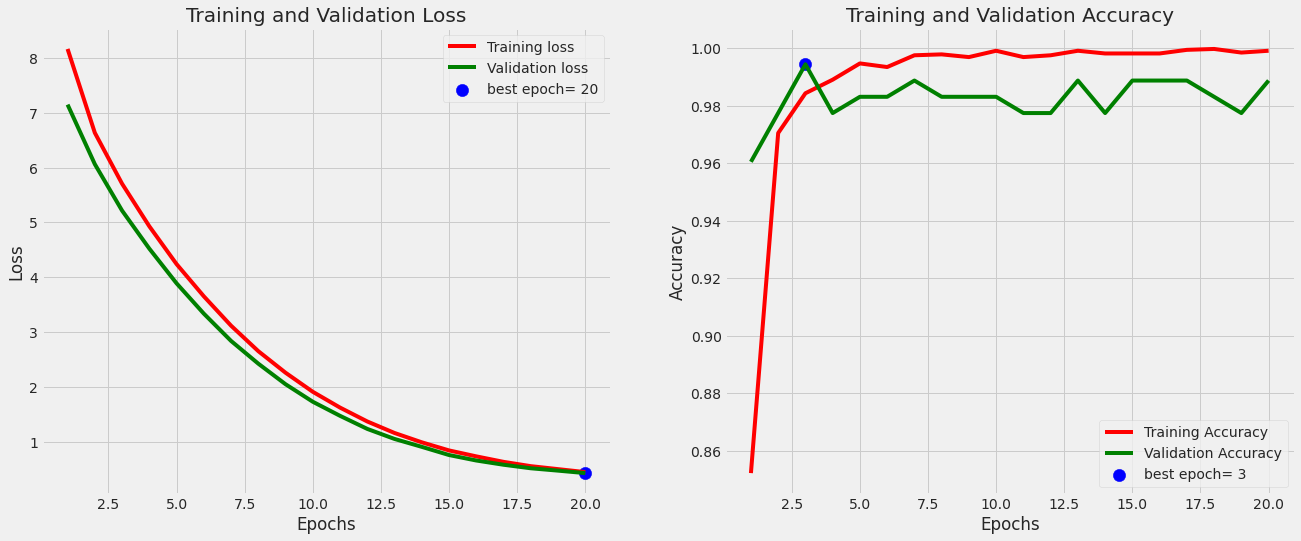

59/59 [==============================] - 3s 40ms/step - loss: 0.4134 - accuracy: 0.9944
accuracy on the test set is 99.44 %



In [ ]:
tr_plot(history,0)
save_dir=r'./'
subject='tumors'
acc=model.evaluate( test_gen, batch_size=test_batch_size, verbose=1, steps=test_steps, return_dict=False)[1]*100
msg=f'accuracy on the test set is {acc:5.2f} %'
print_in_color(msg, (0,255,0),(55,65,80))
save_id=str (model_name +  '-' + subject +'-'+ str(acc)[:str(acc).rfind('.')+3] + '.h5')
save_loc=os.path.join(save_dir, save_id)
model.save(save_loc)

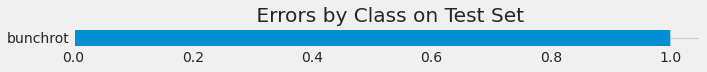

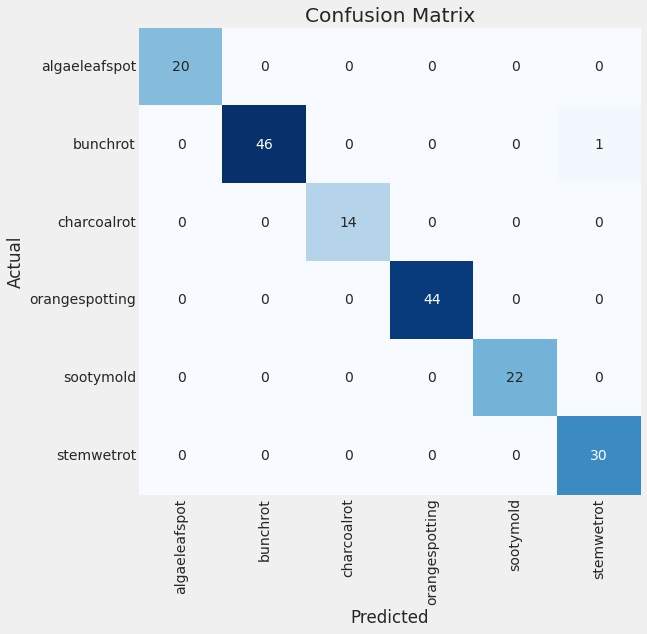

Classification Report:
----------------------
                 precision    recall  f1-score   support

 algaeleafspot       1.00      1.00      1.00        20
      bunchrot       1.00      0.98      0.99        47
   charcoalrot       1.00      1.00      1.00        14
orangespotting       1.00      1.00      1.00        44
     sootymold       1.00      1.00      1.00        22
    stemwetrot       0.97      1.00      0.98        30

      accuracy                           0.99       177
     macro avg       0.99      1.00      1.00       177
  weighted avg       0.99      0.99      0.99       177



In [ ]:
print_code=0
preds=model.predict(test_gen) 
print_info( test_gen, preds, print_code, save_dir, subject )  

**Fine-tune weight during training**

In [ ]:
model_name='InceptionResNetV2'
base_model=tf.keras.applications.InceptionResNetV2(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)        
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 

219070464/219055592 [==============================] - 2s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [ ]:
epochs =10
patience= 1 # number of epochs to wait to adjust lr if monitored value does not improve
stop_patience =3 # number of epochs to wait before stopping training if monitored value does not improve
threshold=.9 # if train accuracy is < threshhold adjust monitor accuracy, else monitor validation loss
factor=.5 # factor to reduce lr by
dwell=True # experimental, if True and monitored metric does not improve on current epoch set  modelweights back to weights of previous epoch
freeze=False # if true free weights of  the base model

callbacks=[LRA(model=model,patience=patience,stop_patience=stop_patience, threshold=threshold,
                   factor=factor,dwell=dwell, model_name=model_name, freeze=freeze, initial_epoch=0 )]
LRA.tepochs=epochs  # used to determine value of last epoch for printing
history=model.fit(x=train_gen,  epochs=epochs, verbose=0, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0, class_weight=class_weight)

 Starting training using  base model InceptionResNetV2 with weights frozen to imagenet weights initializing LRA callback

Epoch 1/10
60/60 [==============================] - ETA: 0s - loss: 7.4978 - accuracy: 0.9366 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR   Monitor  Duration

 1 /10     7.498   93.663   6.74470  100.000  0.00100  0.00100  val_loss   144.20 

60/60 [==============================] - 145s 2s/step - loss: 7.4978 - accuracy: 0.9366 - val_loss: 6.7447 - val_accuracy: 1.0000
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 6.0433 - accuracy: 0.9945 2 /10     6.043   99.451   5.85969  97.727   0.00100  0.00100  val_loss   103.47 

60/60 [==============================] - 104s 2s/step - loss: 6.0433 - accuracy: 0.9945 - val_loss: 5.8597 - val_accuracy: 0.9773
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 5.3555 - accuracy: 0.9983 3 /10     5.355   99.831   5.06382  100.000  0.00100  0.00100  val_loss   103.25 

60/

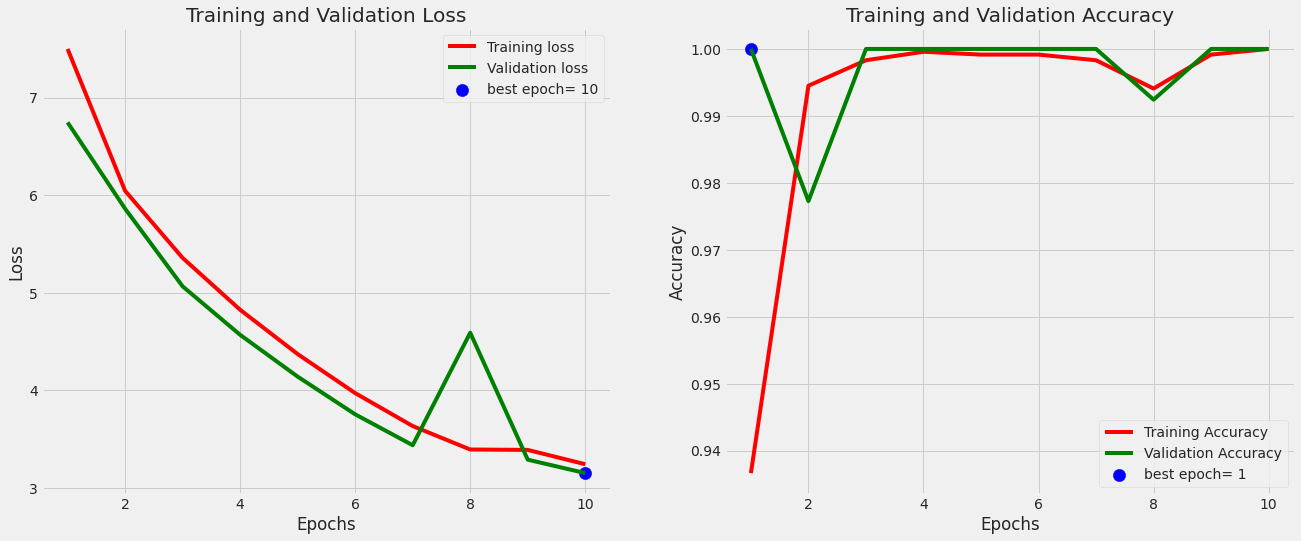

4/4 [==============================] - 4s 430ms/step - loss: 3.1434 - accuracy: 1.0000
accuracy on the test set is 100.00 %



In [ ]:
tr_plot(history,0)
save_dir=r'./'
subject='tumors'
acc=model.evaluate( test_gen, batch_size=test_batch_size, verbose=1, steps=test_steps, return_dict=False)[1]*100
msg=f'accuracy on the test set is {acc:5.2f} %'
print_in_color(msg, (0,255,0),(55,65,80))
save_id=str (model_name +  '-' + subject +'-'+ str(acc)[:str(acc).rfind('.')+3] + '.h5')
save_loc=os.path.join(save_dir, save_id)
model.save(save_loc)

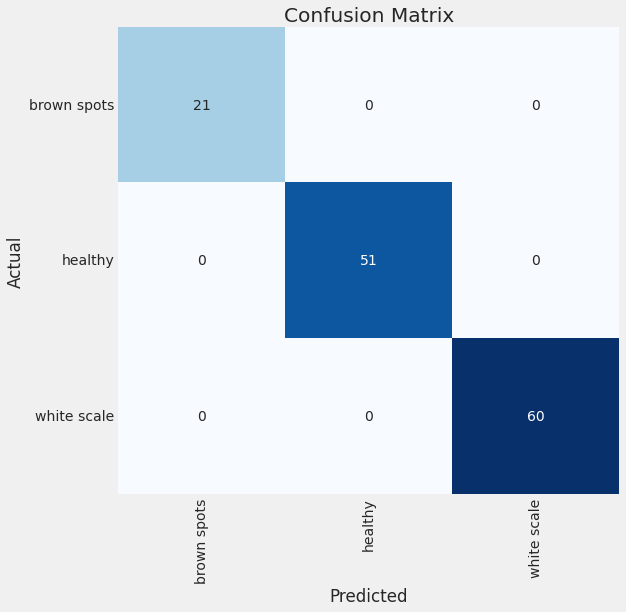

Classification Report:
----------------------
               precision    recall  f1-score   support

 brown spots       1.00      1.00      1.00        21
     healthy       1.00      1.00      1.00        51
 white scale       1.00      1.00      1.00        60

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



In [ ]:
print_code=0
preds=model.predict(test_gen) 
print_info( test_gen, preds, print_code, save_dir, subject )  

# VGG-19 model

**Freeze the weight during training**

In [ ]:
model_name='VGG19'
base_model=tf.keras.applications.vgg19.VGG19(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)        
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)

# freeze all layers of the pre-trained InceptionV3 model
for layer in base_model.layers:
    layer.trainable = False

model.compile(Adamax(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 

80150528/80134624 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [ ]:
epochs =20
patience= 1 # number of epochs to wait to adjust lr if monitored value does not improve
stop_patience =3 # number of epochs to wait before stopping training if monitored value does not improve
threshold=.9 # if train accuracy is < threshhold adjust monitor accuracy, else monitor validation loss
factor=.5 # factor to reduce lr by
dwell=True # experimental, if True and monitored metric does not improve on current epoch set  modelweights back to weights of previous epoch
freeze=True # if true free weights of  the base model

callbacks=[LRA(model=model,patience=patience,stop_patience=stop_patience, threshold=threshold,
                   factor=factor,dwell=dwell, model_name=model_name, freeze=freeze, initial_epoch=0 )]
LRA.tepochs=epochs  # used to determine value of last epoch for printing
history=model.fit(x=train_gen,  epochs=epochs, verbose=0, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0, class_weight=class_weight)

 Starting training using  base model VGG19 with weights frozen to imagenet weights initializing LRA callback

 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR   Monitor  Duration

 1 /20     6.922   77.460   5.85908  87.006   0.00100  0.00100  accuracy   32.09  

 2 /20     5.455   95.347   4.89788  97.175   0.00100  0.00100  val_loss   22.43  

 3 /20     4.743   97.108   4.23324  98.870   0.00100  0.00100  val_loss   22.01  

 4 /20     4.115   98.522   3.69511  99.435   0.00100  0.00100  val_loss   23.53  

 5 /20     3.573   99.120   3.21316  99.435   0.00100  0.00100  val_loss   22.11  

 6 /20     3.092   99.183   2.78200  99.435   0.00100  0.00100  val_loss   23.41  

 7 /20     2.663   99.623   2.39149  99.435   0.00100  0.00100  val_loss   22.21  

 8 /20     2.291   99.749   2.05030  99.435   0.00100  0.00100  val_loss   23.35  

 9 /20     1.964   99.686   1.74686  99.435   0.00100  0.00100  val_loss   22.30  

10 /20     1.675   99.780   1.48220  100.000  0.00

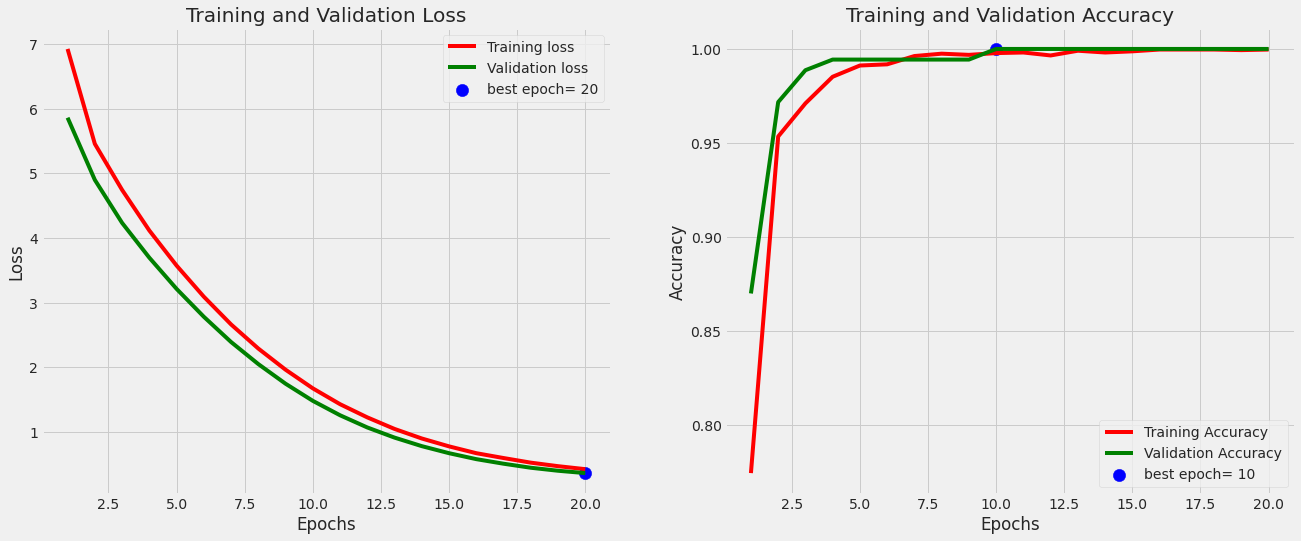

59/59 [==============================] - 3s 31ms/step - loss: 0.3668 - accuracy: 1.0000
accuracy on the test set is 100.00 %



In [ ]:
tr_plot(history,0)
save_dir=r'./'
subject='tumors'
acc=model.evaluate( test_gen, batch_size=test_batch_size, verbose=1, steps=test_steps, return_dict=False)[1]*100
msg=f'accuracy on the test set is {acc:5.2f} %'
print_in_color(msg, (0,255,0),(55,65,80))
save_id=str (model_name +  '-' + subject +'-'+ str(acc)[:str(acc).rfind('.')+3] + '.h5')
save_loc=os.path.join(save_dir, save_id)
model.save(save_loc)

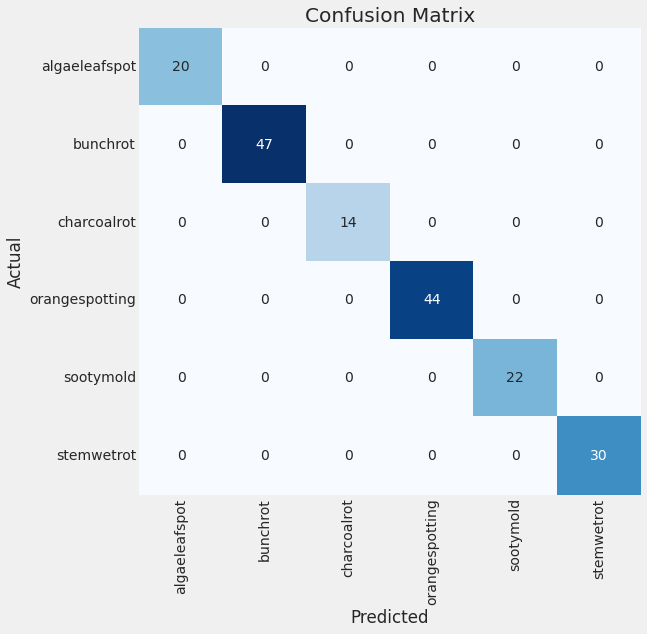

Classification Report:
----------------------
                 precision    recall  f1-score   support

 algaeleafspot       1.00      1.00      1.00        20
      bunchrot       1.00      1.00      1.00        47
   charcoalrot       1.00      1.00      1.00        14
orangespotting       1.00      1.00      1.00        44
     sootymold       1.00      1.00      1.00        22
    stemwetrot       1.00      1.00      1.00        30

      accuracy                           1.00       177
     macro avg       1.00      1.00      1.00       177
  weighted avg       1.00      1.00      1.00       177



In [ ]:
print_code=0
preds=model.predict(test_gen) 
print_info( test_gen, preds, print_code, save_dir, subject )  

**Fine-tuning weight during training**

In [ ]:
model_name='VGG19'
base_model=tf.keras.applications.vgg19.VGG19(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)        
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 

80150528/80134624 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [ ]:
epochs =20
patience= 1 # number of epochs to wait to adjust lr if monitored value does not improve
stop_patience =3 # number of epochs to wait before stopping training if monitored value does not improve
threshold=.9 # if train accuracy is < threshhold adjust monitor accuracy, else monitor validation loss
factor=.5 # factor to reduce lr by
dwell=True # experimental, if True and monitored metric does not improve on current epoch set  modelweights back to weights of previous epoch
freeze=False # if true free weights of  the base model

callbacks=[LRA(model=model,patience=patience,stop_patience=stop_patience, threshold=threshold,
                   factor=factor,dwell=dwell, model_name=model_name, freeze=freeze, initial_epoch=0 )]
LRA.tepochs=epochs  # used to determine value of last epoch for printing
history=model.fit(x=train_gen,  epochs=epochs, verbose=0, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0, class_weight=class_weight)

 Starting training using  base model VGG19 with weights frozen to imagenet weights initializing LRA callback

 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR   Monitor  Duration

 1 /20     1.730   94.423   3.34824  36.364   0.00013  0.00013  val_loss   76.41  

 2 /20     1.680   94.973   4.95245  28.030   0.00013  0.00006  val_loss   76.15  

 3 /20     1.676   95.817   2.84155  41.667   0.00006  0.00006  val_loss   76.29  

 4 /20     1.658   95.606   2.36768  59.848   0.00006  0.00006  val_loss   76.24  

 5 /20     1.622   96.240   2.22348  60.606   0.00006  0.00006  val_loss   76.15  

 6 /20     1.601   96.155   1.95232  78.788   0.00006  0.00006  val_loss   76.12  

 7 /20     1.582   95.944   1.91286  78.030   0.00006  0.00006  val_loss   76.27  

 8 /20     1.553   96.662   1.67339  89.394   0.00006  0.00006  val_loss   76.30  

 9 /20     1.532   96.493   1.68643  87.879   0.00006  0.00003  val_loss   76.21  

10 /20     1.532   96.578   1.62370  90.152   0.00

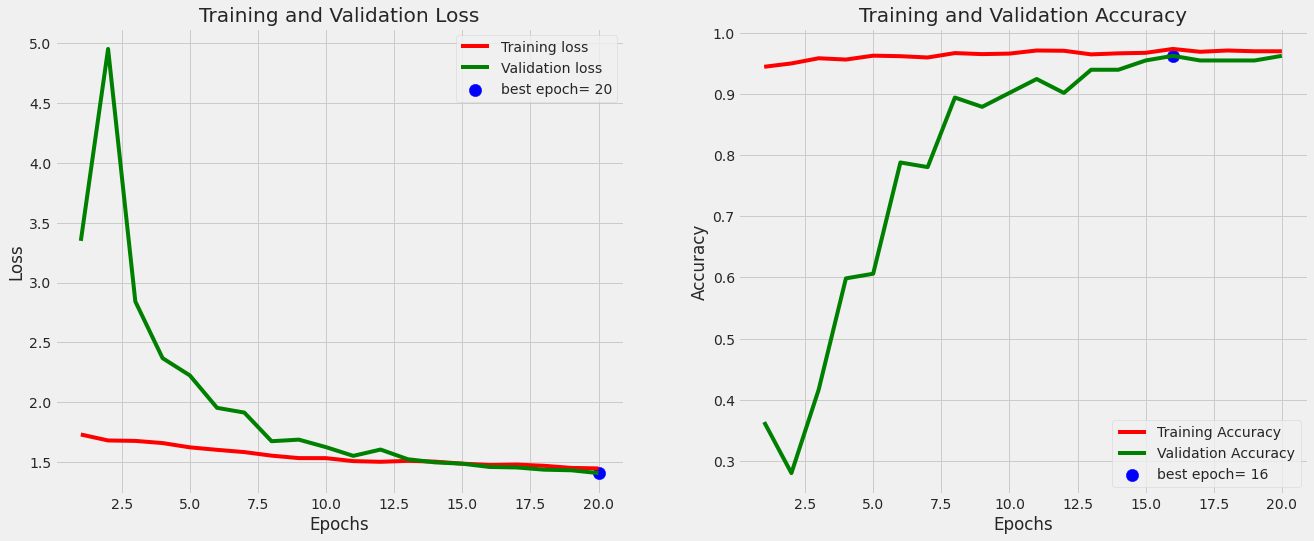

4/4 [==============================] - 12s 386ms/step - loss: 1.3848 - accuracy: 0.9773
accuracy on the test set is 97.73 %



In [ ]:
tr_plot(history,0)
save_dir=r'./'
subject='tumors'
acc=model.evaluate( test_gen, batch_size=test_batch_size, verbose=1, steps=test_steps, return_dict=False)[1]*100
msg=f'accuracy on the test set is {acc:5.2f} %'
print_in_color(msg, (0,255,0),(55,65,80))
save_id=str (model_name +  '-' + subject +'-'+ str(acc)[:str(acc).rfind('.')+3] + '.h5')
save_loc=os.path.join(save_dir, save_id)
model.save(save_loc)

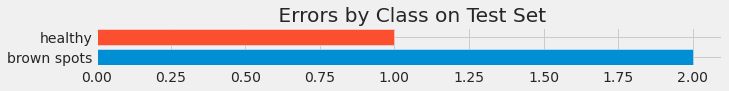

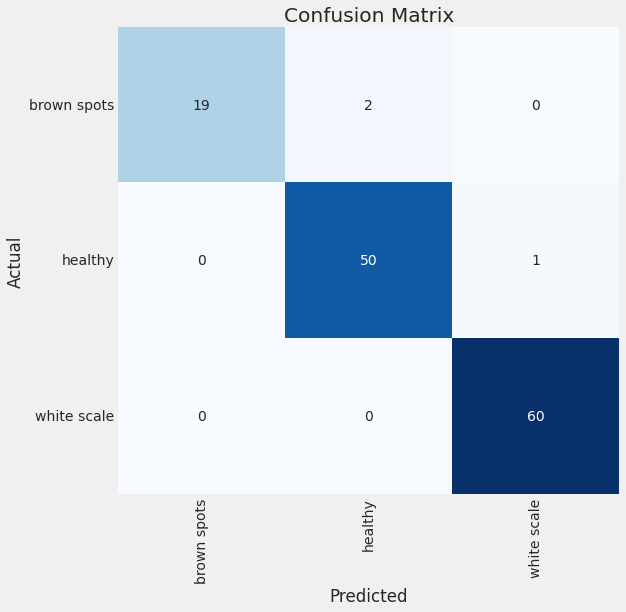

Classification Report:
----------------------
               precision    recall  f1-score   support

 brown spots       1.00      0.90      0.95        21
     healthy       0.96      0.98      0.97        51
 white scale       0.98      1.00      0.99        60

    accuracy                           0.98       132
   macro avg       0.98      0.96      0.97       132
weighted avg       0.98      0.98      0.98       132



In [ ]:
print_code=0
preds=model.predict(test_gen) 
print_info( test_gen, preds, print_code, save_dir, subject )  

# Xception model

In [ ]:
height=299
width=299
channels=3
batch_size=40
img_shape=(height, width, channels)
img_size=(height, width)

**Freeze the weight during training**

In [ ]:
model_name='Xception'
base_model=tf.keras.applications.xception.Xception(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)        
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)

# freeze all layers of the pre-trained InceptionV3 model
for layer in base_model.layers:
    layer.trainable = False

model.compile(Adamax(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 

83697664/83683744 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [ ]:
epochs =20
patience= 1 # number of epochs to wait to adjust lr if monitored value does not improve
stop_patience =3 # number of epochs to wait before stopping training if monitored value does not improve
threshold=.9 # if train accuracy is < threshhold adjust monitor accuracy, else monitor validation loss
factor=.5 # factor to reduce lr by
dwell=True # experimental, if True and monitored metric does not improve on current epoch set  modelweights back to weights of previous epoch
freeze=True # if true free weights of  the base model

callbacks=[LRA(model=model,patience=patience,stop_patience=stop_patience, threshold=threshold,
                   factor=factor,dwell=dwell, model_name=model_name, freeze=freeze, initial_epoch=0 )]
LRA.tepochs=epochs  # used to determine value of last epoch for printing
history=model.fit(x=train_gen,  epochs=epochs, verbose=0, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0, class_weight=class_weight)

 Starting training using  base model Xception with weights frozen to imagenet weights initializing LRA callback

 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR   Monitor  Duration

 1 /20     8.083   91.638   6.92918  98.870   0.00100  0.00100  val_loss   21.49  

 2 /20     6.446   98.743   5.76202  98.870   0.00100  0.00100  val_loss   14.74  

 3 /20     5.358   99.371   4.82085  98.870   0.00100  0.00100  val_loss   14.08  

 4 /20     4.467   99.560   4.02175  99.435   0.00100  0.00100  val_loss   13.94  

 5 /20     3.706   99.780   3.34378  99.435   0.00100  0.00100  val_loss   14.30  

 6 /20     3.074   99.937   2.77293  99.435   0.00100  0.00100  val_loss   14.17  

 7 /20     2.547   99.937   2.29000  99.435   0.00100  0.00100  val_loss   14.20  

 8 /20     2.107   99.811   1.89039  99.435   0.00100  0.00100  val_loss   14.33  

 9 /20     1.738   99.969   1.56405  99.435   0.00100  0.00100  val_loss   14.34  

10 /20     1.436   99.937   1.28272  99.435   0

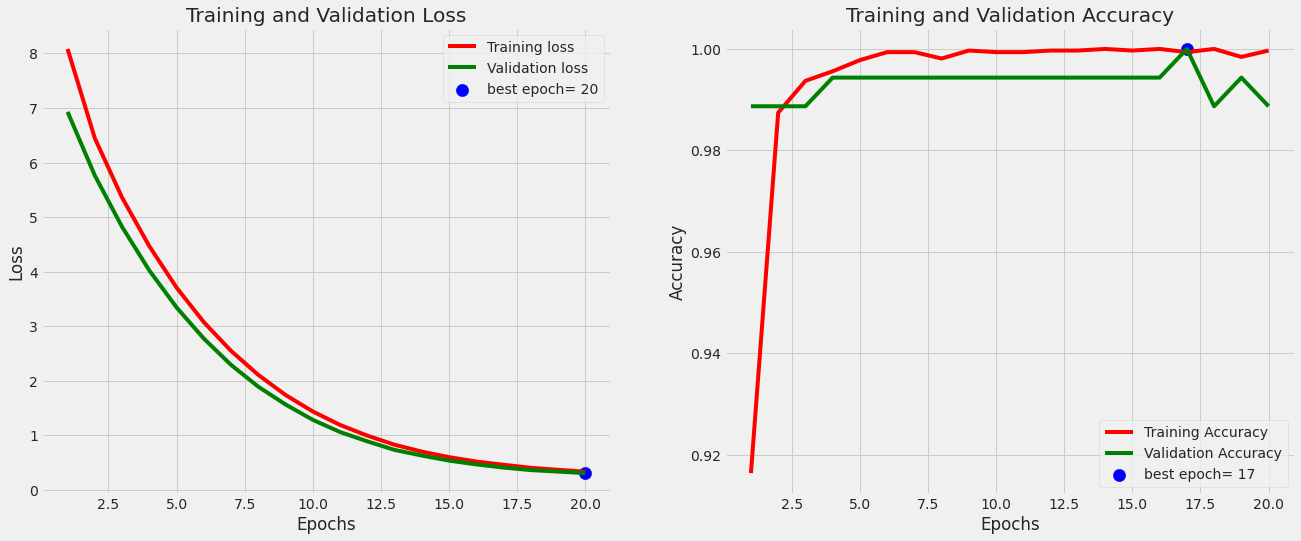

59/59 [==============================] - 2s 19ms/step - loss: 0.2838 - accuracy: 1.0000
accuracy on the test set is 100.00 %



In [ ]:
tr_plot(history,0)
save_dir=r'./'
subject='tumors'
acc=model.evaluate( test_gen, batch_size=test_batch_size, verbose=1, steps=test_steps, return_dict=False)[1]*100
msg=f'accuracy on the test set is {acc:5.2f} %'
print_in_color(msg, (0,255,0),(55,65,80))
save_id=str (model_name +  '-' + subject +'-'+ str(acc)[:str(acc).rfind('.')+3] + '.h5')
save_loc=os.path.join(save_dir, save_id)
model.save(save_loc)

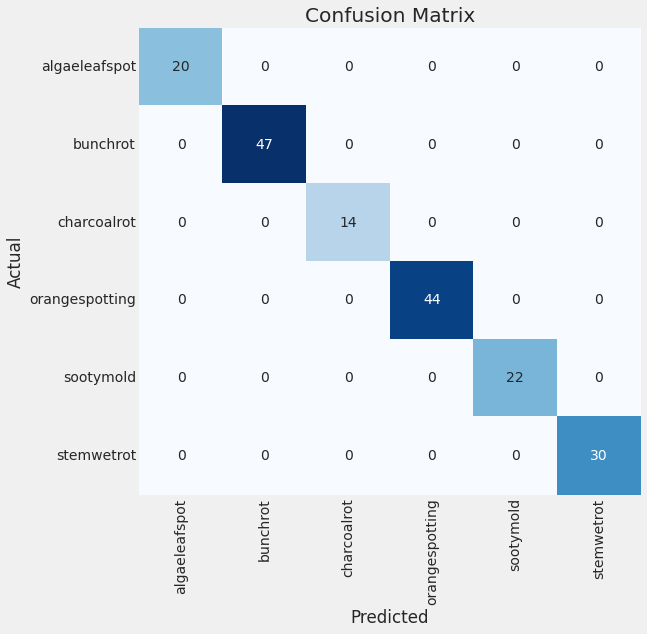

Classification Report:
----------------------
                 precision    recall  f1-score   support

 algaeleafspot       1.00      1.00      1.00        20
      bunchrot       1.00      1.00      1.00        47
   charcoalrot       1.00      1.00      1.00        14
orangespotting       1.00      1.00      1.00        44
     sootymold       1.00      1.00      1.00        22
    stemwetrot       1.00      1.00      1.00        30

      accuracy                           1.00       177
     macro avg       1.00      1.00      1.00       177
  weighted avg       1.00      1.00      1.00       177



In [ ]:
print_code=0
preds=model.predict(test_gen) 
print_info( test_gen, preds, print_code, save_dir, subject )  

**Fine-tuning weight during training**

In [ ]:
model_name='Xception'
base_model=tf.keras.applications.xception.Xception(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)        
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
epochs =20
patience= 1 # number of epochs to wait to adjust lr if monitored value does not improve
stop_patience =3 # number of epochs to wait before stopping training if monitored value does not improve
threshold=.9 # if train accuracy is < threshhold adjust monitor accuracy, else monitor validation loss
factor=.5 # factor to reduce lr by
dwell=True # experimental, if True and monitored metric does not improve on current epoch set  modelweights back to weights of previous epoch
freeze=False # if true free weights of  the base model

callbacks=[LRA(model=model,patience=patience,stop_patience=stop_patience, threshold=threshold,
                   factor=factor,dwell=dwell, model_name=model_name, freeze=freeze, initial_epoch=0 )]
LRA.tepochs=epochs  # used to determine value of last epoch for printing
history=model.fit(x=train_gen,  epochs=epochs, verbose=0, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0, class_weight=class_weight)

 Starting training using base model Xception training all layers 



Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7fe826058dd0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 358, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:
tr_plot(history,0)
save_dir=r'./'
subject='tumors'
acc=model.evaluate( test_gen, batch_size=test_batch_size, verbose=1, steps=test_steps, return_dict=False)[1]*100
msg=f'accuracy on the test set is {acc:5.2f} %'
print_in_color(msg, (0,255,0),(55,65,80))
save_id=str (model_name +  '-' + subject +'-'+ str(acc)[:str(acc).rfind('.')+3] + '.h5')
save_loc=os.path.join(save_dir, save_id)
model.save(save_loc)

In [ ]:
print_code=0
preds=model.predict(test_gen) 
print_info( test_gen, preds, print_code, save_dir, subject )  

# Load model

In [ ]:
xception_model = load_model('Xception-tumors-100.0.h5')
vgg19_model = load_model('VGG19-tumors-97.72.h5')
inceptionresnetv2_model = load_model('InceptionResNetV2-tumors-100.0.h5')

In [ ]:
xception_model.evaluate_generator(test_gen)

In [ ]:
vgg19_model.evaluate_generator(test_gen)

In [ ]:
inceptionresnetv2_model.evaluate_generator(test_gen)

# Predict a single image

In [ ]:
df[df['labels'] == 'white scale'].head(10)

,filepaths,labels
1203,/content/Date Palm data/white scale/wsphase1-4...,white scale
1204,/content/Date Palm data/white scale/WSstage3-1...,white scale
1205,/content/Date Palm data/white scale/wsphase2-4...,white scale
1206,/content/Date Palm data/white scale/wsphase2-4...,white scale
1207,/content/Date Palm data/white scale/wsphase1-2...,white scale
1208,/content/Date Palm data/white scale/WSstage3-7...,white scale
1209,/content/Date Palm data/white scale/wsphase1-4...,white scale
1210,/content/Date Palm data/white scale/WSstage3-1...,white scale
1211,/content/Date Palm data/white scale/wsphase1-2...,white scale
1212,/content/Date Palm data/white scale/wsphase2-2...,white scale


In [ ]:
df[df['labels'] == 'healthy'].head(10)

,filepaths,labels
0,/content/Date Palm data/healthy/healthy-184.jpg,healthy
1,/content/Date Palm data/healthy/healthy-428.jpg,healthy
2,/content/Date Palm data/healthy/healthy-692.jpg,healthy
3,/content/Date Palm data/healthy/healthy-671.jpg,healthy
4,/content/Date Palm data/healthy/healthy-165.jpg,healthy
5,/content/Date Palm data/healthy/healthy-937.jpg,healthy
6,/content/Date Palm data/healthy/healthy-372.jpg,healthy
7,/content/Date Palm data/healthy/healthy-348.jpg,healthy
8,/content/Date Palm data/healthy/healthy-138.jpg,healthy
9,/content/Date Palm data/healthy/healthy-1007.jpg,healthy


In [ ]:
df[df['labels'] == 'brown spots'].head(10)

,filepaths,labels
2161,/content/Date Palm data/brown spots/brownspots...,brown spots
2162,/content/Date Palm data/brown spots/brownspots...,brown spots
2163,/content/Date Palm data/brown spots/brownspots...,brown spots
2164,/content/Date Palm data/brown spots/brownspots...,brown spots
2165,/content/Date Palm data/brown spots/brownspots...,brown spots
2166,/content/Date Palm data/brown spots/brownspots...,brown spots
2167,/content/Date Palm data/brown spots/brownspots...,brown spots
2168,/content/Date Palm data/brown spots/brownspots...,brown spots
2169,/content/Date Palm data/brown spots/brownspots...,brown spots
2170,/content/Date Palm data/brown spots/brownspots...,brown spots


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [ ]:
def predict_image(directory, model, img_shape):
  image_directory = directory
  print(image_directory)
  my_image = image.load_img(image_directory, target_size=img_shape)
  plt.imshow(my_image)
  plt.show()

  my_image_arr = image.img_to_array(my_image)
  my_image_arr = my_image_arr/127.5-1
  my_image_arr = np.expand_dims(my_image_arr, axis=0)

  label = np.argmax(model.predict(my_image_arr))
  probs = model.predict(my_image_arr)
  print(probs[0])
  print(model.predict(my_image_arr))
  label_dict = {0:'algaeleafspot',1:'bunchrot',2:'charcoalrot', 3:'orangespotting', 4:'sootymold', 5:'stemwetrot'}
  print('The class of the input image is belong to %s'% label_dict[label])

In [ ]:
model = load_model('/content/Xception-tumors-69.99.h5')

/content/algaeleafspot-4.jpg


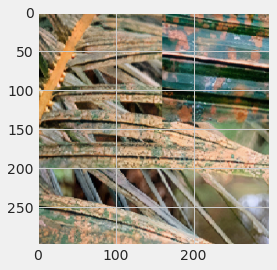

[1.4714567e-02 6.2950402e-02 1.0779522e-03 3.0235219e-04 9.2060119e-01
 3.5357790e-04]
[[1.4714567e-02 6.2950402e-02 1.0779522e-03 3.0235219e-04 9.2060119e-01
  3.5357790e-04]]
The class of the input image is belong to sootymold


In [ ]:
predict_image('/content/algaeleafspot-4.jpg', model, (299,299))

/content/orangespotting-1.jpg


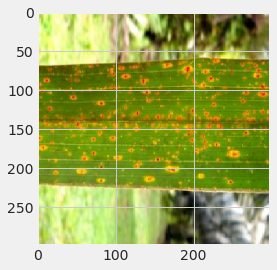

[0.02360383 0.04976876 0.05652201 0.80780625 0.04645858 0.01584054]
[[0.02360383 0.04976876 0.05652201 0.80780625 0.04645858 0.01584054]]
The class of the input image is belong to orangespotting


In [ ]:
image_directory = '/content/orangespotting-1.jpg'
print(image_directory)
my_image = image.load_img(image_directory, target_size=(299,299))
plt.imshow(my_image)
plt.show()

my_image_arr = image.img_to_array(my_image)
my_image_arr = my_image_arr/127.5-1
my_image_arr = np.expand_dims(my_image_arr, axis=0)

label = np.argmax(model.predict(my_image_arr))
probs = model.predict(my_image_arr)
print(probs[0])
print(model.predict(my_image_arr))
label_dict = {0:'algaeleafspot',1:'bunchrot',2:'charcoalrot', 3:'orangespotting', 4:'sootymold', 5:'stemwetrot'}
print('The class of the input image is belong to %s'% label_dict[label])

In [ ]:
labels = np.array(list(label_dict.values()))

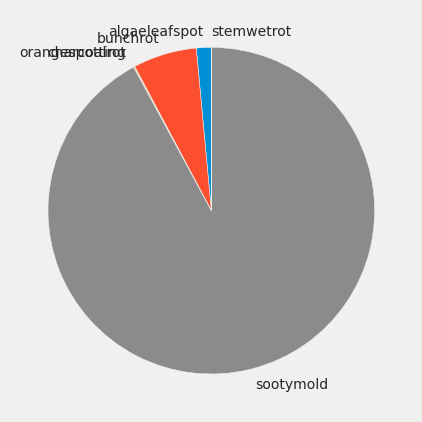

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.pie(probs[0], labels=labels, startangle = 90)
plt.show()

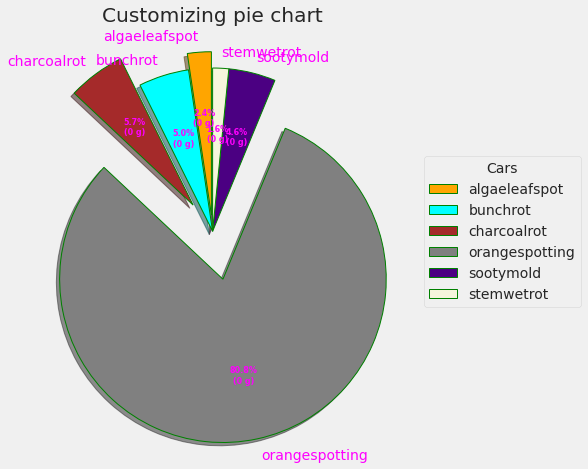

In [ ]:
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(probs[0],
                                  autopct = lambda pct: func(pct, probs[0]),
                                  explode = explode,
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, labels,
          title ="Cars",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")
 
# show plot
plt.show()